# IMPORTING THE  MODULES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

# DATASET

In [2]:
dataset = pd.read_excel("Iris_dataset.xlsx")

In [3]:
dataset.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
dataset.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
dataset["variety"].value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

# PREPROCESSING OF DATA

In [7]:
# CHECKING NULL VALUES
dataset.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

# ANALYSIS

<Axes: >

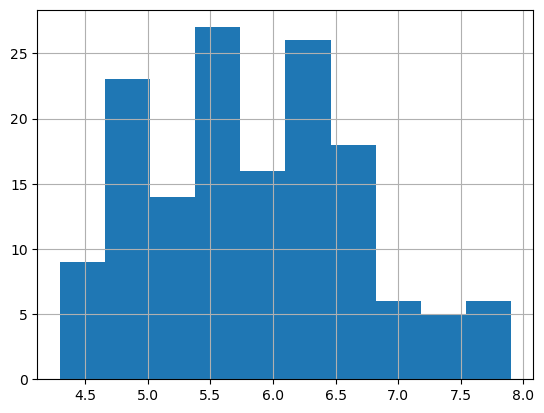

In [8]:
dataset["sepal.length"].hist()

<Axes: >

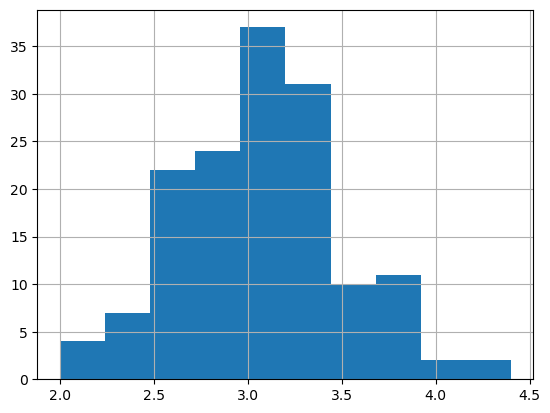

In [9]:
dataset["sepal.width"].hist()

<Axes: >

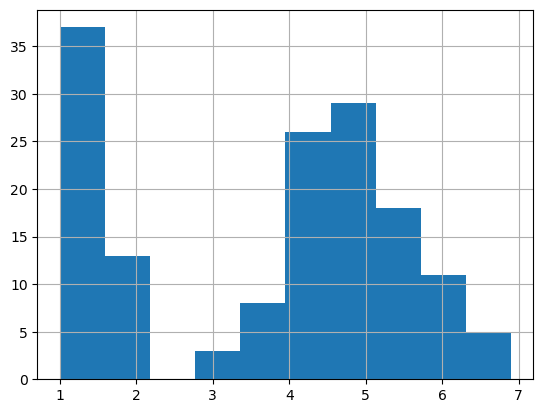

In [10]:
dataset["petal.length"].hist()

<Axes: >

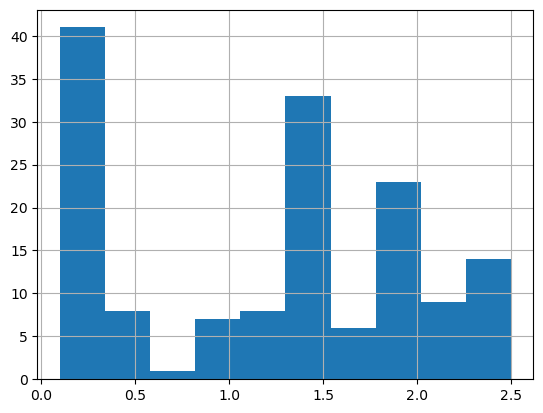

In [11]:
dataset["petal.width"].hist()

In [12]:
varieties = ['Setosa','Versicolor','Virginica']
colors = ['purple','red','yellow']

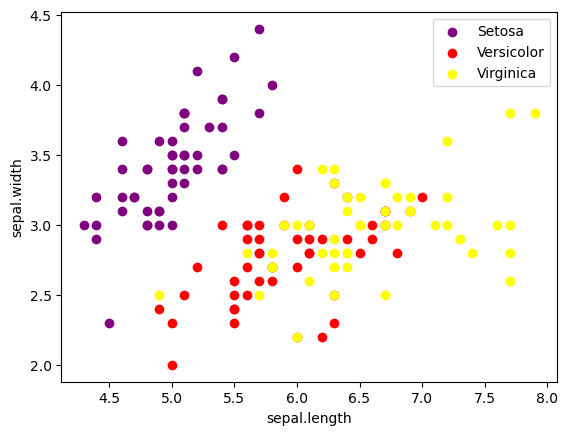

In [13]:
plt.xlabel("sepal.length")
plt.ylabel("sepal.width")

for i in range(3) :
    a = dataset[dataset["variety"] == varieties[i]]
    plt.scatter(a["sepal.length"],a["sepal.width"],c=colors[i],label=varieties[i])
plt.legend()

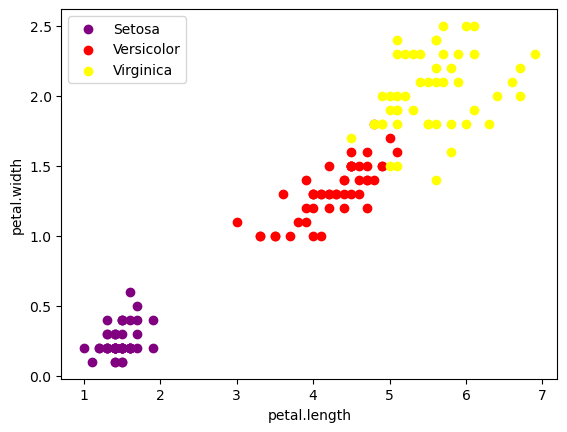

In [14]:
plt.xlabel("petal.length")
plt.ylabel("petal.width")

for i in range(3) :
    a = dataset[dataset["variety"] == varieties[i]]
    plt.scatter(a["petal.length"],a["petal.width"],c=colors[i],label=varieties[i])
plt.legend()

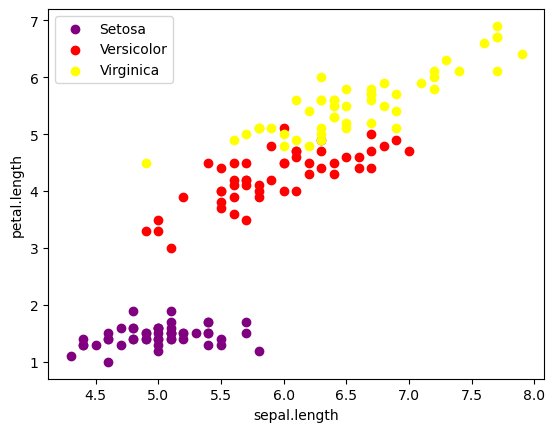

In [15]:
plt.xlabel("sepal.length")
plt.ylabel("petal.length")

for i in range(3) :
    a = dataset[dataset["variety"] == varieties[i]]
    plt.scatter(a["sepal.length"],a["petal.length"],c=colors[i],label=varieties[i])
plt.legend()

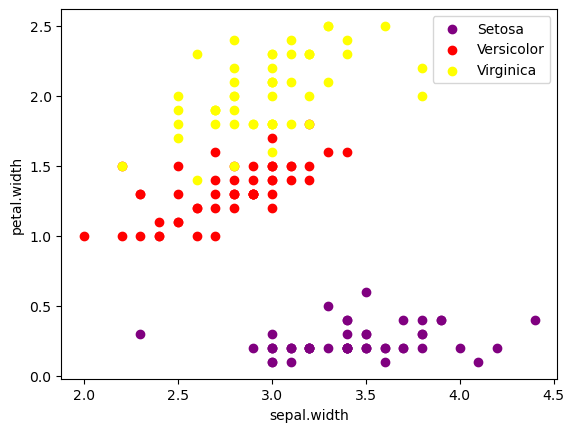

In [16]:
plt.xlabel("sepal.width")
plt.ylabel("petal.width")

for i in range(3) :
    a = dataset[dataset["variety"] == varieties[i]]
    plt.scatter(a["sepal.width"],a["petal.width"],c=colors[i],label=varieties[i])
plt.legend()

# COORELATION MATRIX

C:\Users\Hp\AppData\Local\Temp\ipykernel_15036\1586441641.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset.corr()


<Axes: >

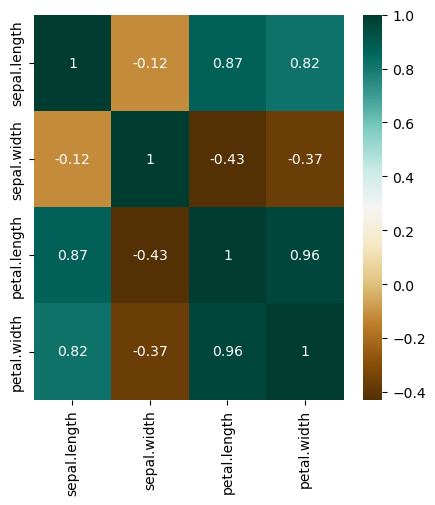

In [17]:
corr = dataset.corr()
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(corr,annot=True,ax=ax,cmap = 'BrBG')
#            fmt = '.2f')


# LABEL ENCODER

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [19]:
dataset["variety"] = le.fit_transform(dataset["variety"])
dataset.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# TRAINING MODEL

In [20]:
from sklearn.model_selection import train_test_split
X =dataset.drop(columns=["variety"])
Y = dataset["variety"]
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.50)

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [22]:
model.fit(x_train,y_train)

LogisticRegression()

In [23]:
print("Accuracy: ",model.score(x_train,y_train)*100)

Accuracy:  96.0


In [24]:
# knn
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [25]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [26]:
print("Accuracy: ",model.score(x_test,y_test)*100)

Accuracy:  98.66666666666667


In [27]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [28]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [29]:
print("Accuracy: ",model.score(x_test,y_test)*100)

Accuracy:  93.33333333333333


In [30]:
import pandas_profiling as pp
pp.ProfileReport(dataset)

ModuleNotFoundError: No module named 'pandas_profiling'